# Graph theory and visualization

A notebook giving the basics of using the igraph library in R.

Based on Chapter 2 and 3 from [Statistical Analysis of Network Data with R](http://link.springer.com/book/10.1007%2F978-1-4939-0983-4).

To run the notebook [jupyter](http://jupyter.org/) and the [IRkernel](http://irkernel.github.io/installation/) needs to be installed.

In [1]:
# Resizing figures
options(repr.plot.width=5, repr.plot.height=4)

## Quick intro to igraph

In [2]:
library(igraph)

Crate a simple undirected graph

In [3]:
g <- graph.formula(1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7)

A graph consists of Vertices and Edges
$$
G = (V, E)
$$

In [4]:
V(g)

Vertex sequence:
[1] "1" "2" "3" "4" "5" "6" "7"

In [5]:
E(g)

Edge sequence:
           
[1]  2 -- 1
[2]  3 -- 1
[3]  3 -- 2
[4]  4 -- 2
[5]  5 -- 3
[6]  5 -- 4
[7]  6 -- 4
[8]  7 -- 4
[9]  6 -- 5
[10] 7 -- 6

In [6]:
str(g)

IGRAPH UN-- 7 10 -- 
+ attr: name (v/c)
+ edges (vertex names):
1 -- 2, 3
2 -- 1, 3, 4
3 -- 1, 2, 5
4 -- 2, 5, 6, 7
5 -- 3, 4, 6
6 -- 4, 5, 7
7 -- 4, 6


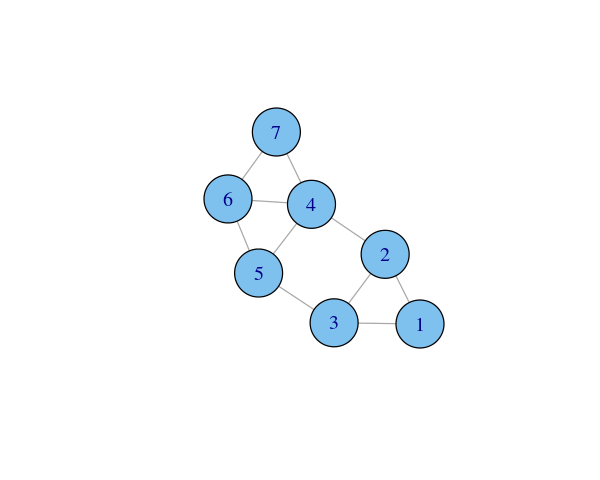

In [7]:
plot(g, vertex.size=50)

## Directed graphs

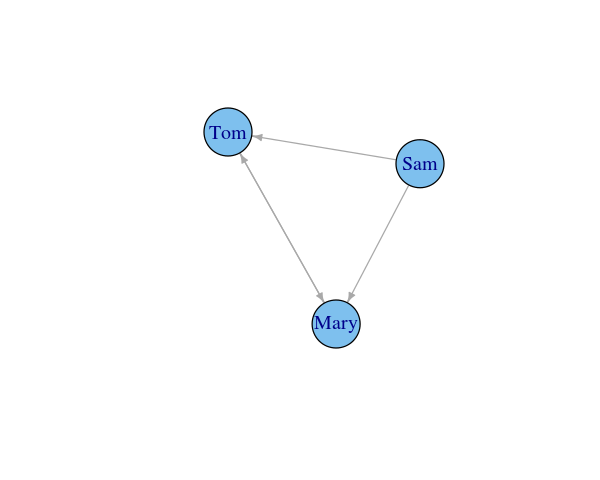

In [8]:
dg <- graph.formula(1-+2, 1-+3, 2++3)
V(dg)$name <- c("Sam", "Mary", "Tom")
plot(dg, vertex.size=50)

In [9]:
get.edgelist(dg)

Sam,Mary
Sam,Tom
Mary,Tom
Tom,Mary


## Adjacency matrix


$$
A_{ij} = \mathbb{1}\{(i,j) \in E \} 
$$

Symetric if $G$ is undirected.

In [10]:
get.adjacency(dg)

3 x 3 sparse Matrix of class "dgCMatrix"
     Sam Mary Tom
Sam    .    1   1
Mary   .    .   1
Tom    .    1   .

## Subgraphs

$H = (V_H, E_H)$ 
is a subgraph of $G = (V_G, E_G)$ if $V_H \subseteq V_G$ and $E_H \subseteq E_G$.

An *induced subgraph* is a subgraph $G' = (V', E')$ with prespecified vertices $V' \subseteq V_G$, 
and the edges $E' \subseteq E_G$ are the collection of edges to be found om $G$ among the subset of vertices.

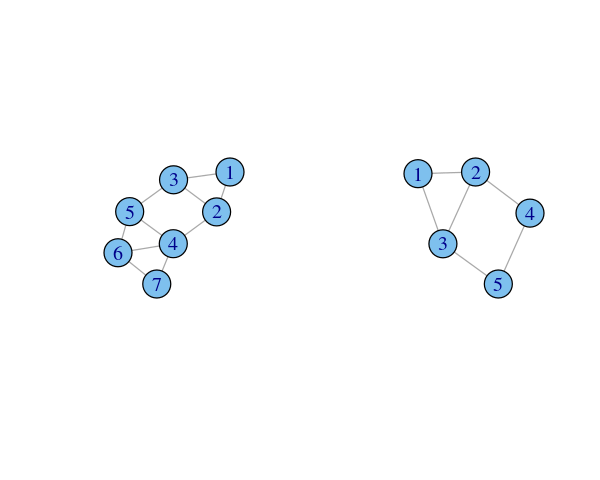

In [11]:
h <- induced.subgraph(g, 1:5)
par(mfrow=c(1,2))
plot(g, vertex.size=50)
plot(h, vertex.size=50)

Can also use subtraction and addition operators

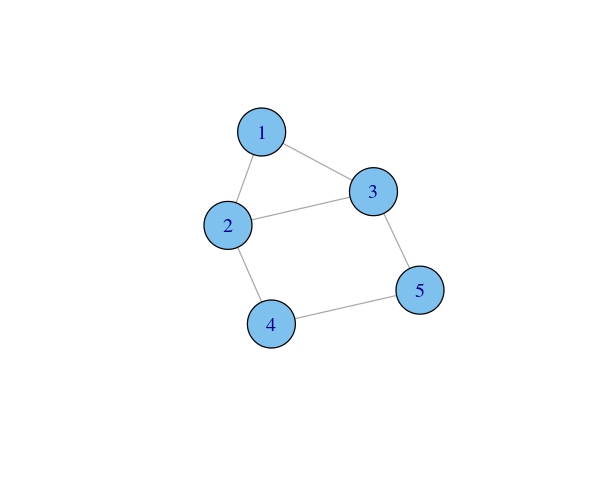

In [12]:
h2 = g - vertices(c(6, 7))
plot(h2, vertex.size=50)

## Decorating graphs

Vertices, edges and/or the whole graph can be given attribues. E.g. gender, weights, distance measures, capasities, etc.

Here we assign gender to our (Tom, Mary, Sam) graph and color accordingly.

In [13]:
g$name <- "People"
V(dg)$gender <- c("M","F","M")
V(dg)$color <- c("lightblue", "pink", "lightblue")

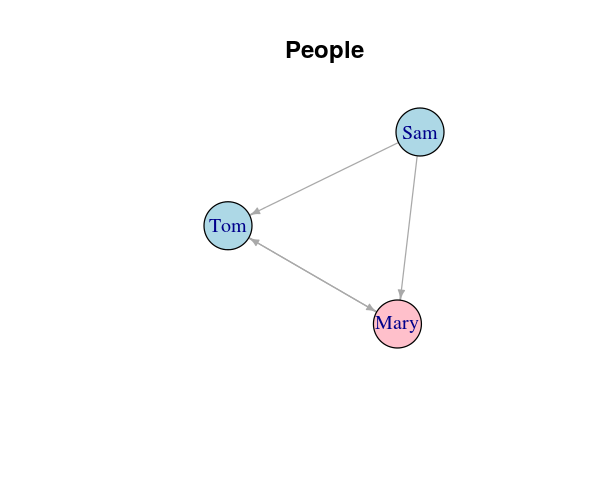

In [14]:
plot(dg, vertex.size=50)
title(g$name)

Assigning weights to the edges

In [15]:
print(is.weighted(g))
wg <- g
E(wg)$weight <- runif(ecount(wg))
print(is.weighted(wg))

[1] FALSE
[1] TRUE


## Using Dataframes

How to creat a graph from dataframes.

This example use the lawyer network by Lazega (2001). One datafram contains the edges, and the other contains the vertex attribues.

In [16]:
library(sand)
head(elist.lazega)

Loading required package: igraphdata

Statistical Analysis of Network Data with R
Type in C2 (+ENTER) to start with Chapter 2.


,V1,V2
1,V1,V17
2,V2,V7
3,V2,V16
4,V2,V17
5,V2,V22
6,V2,V26


In [17]:
head(v.attr.lazega)

,Name,Seniority,Status,Gender,Office,Years,Age,Practice,School
1,V1,1,1,1,1,31,64,1,1
2,V2,2,1,1,1,32,62,2,1
3,V3,3,1,1,2,13,67,1,1
4,V4,4,1,1,1,31,59,2,3
5,V5,5,1,1,2,31,59,1,2
6,V6,6,1,1,2,29,55,1,1


In [18]:
g.lazega <- graph.data.frame(elist.lazega, directed="FALSE", vertices=v.attr.lazega)
g.lazega$name <- "Lazega Lawyers"

In [19]:
# Possible shapes
names(igraph:::.igraph.shapes)

[1] "crectangle" "pie"        "raster"     "square"     "rectangle" 
 [6] "circle"     "none"       "sphere"     "csquare"    "vrectangle"

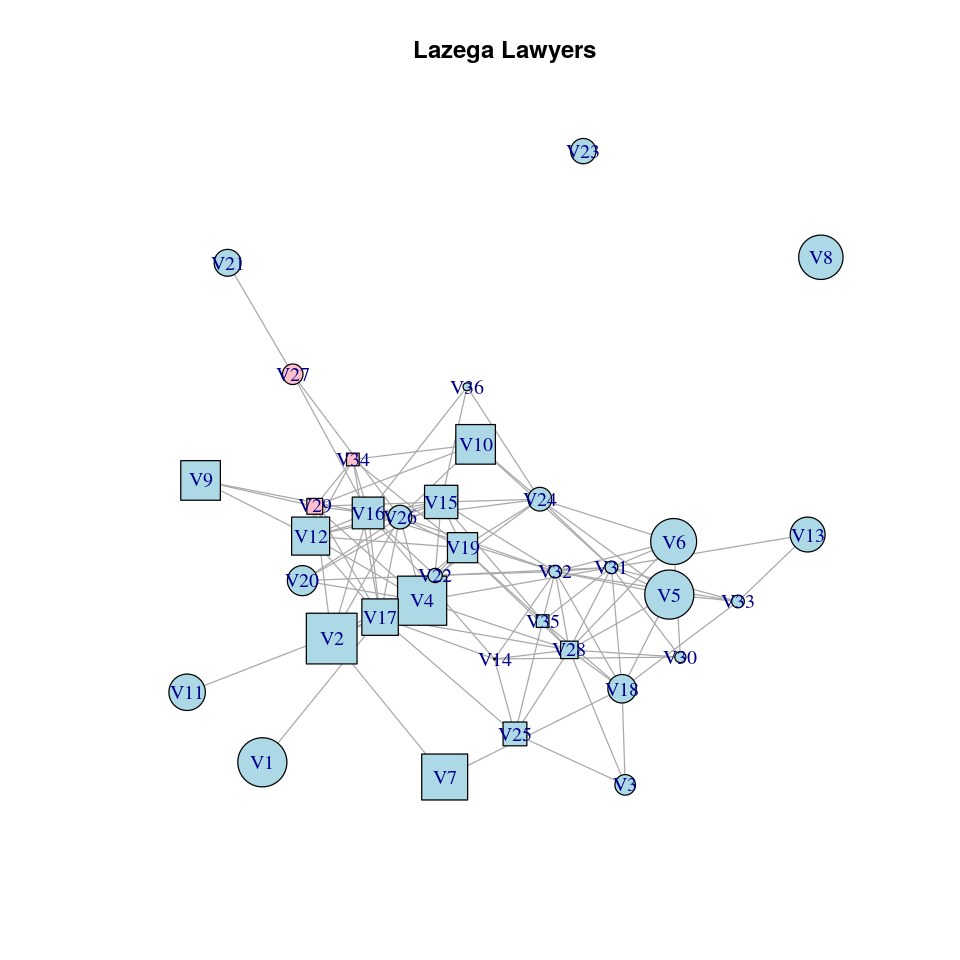

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
set.seed(3)
plot(g.lazega, 
     vertex.size=V(g.lazega)$Years/2,
     vertex.shape=c("circle", "square")[V(g.lazega)$Practice], 
     vertex.color=c("lightblue", "pink")[V(g.lazega)$Gender])
title(g.lazega$name)

In [21]:
options(repr.plot.width=5, repr.plot.height=4)

# Some basic graph concepts

Graphs without loops (edge from node to itself) and mutiple edges between vertices, are called simple. Many models and methods assume the input graph is simple. Multigraphs are often converted to weighted simple graphs instead.

In [22]:
is.simple(g)

[1] TRUE

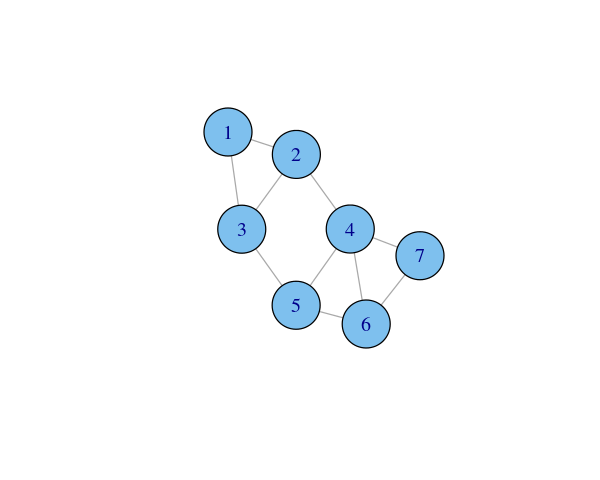

In [23]:
plot(g, vertex.size=50)

### Connectivity

Two verticies are said to be *adjacent* or *neighbors* if they are joined by an edge.

In [24]:
neighbors(g, 5)

[1] 3 4 6

The *degree* of a vertex $v$, say $d_v$, is the number of edges incident on to $v$ (how many edges connected to it). 

In [25]:
print(degree(g))

1 2 3 4 5 6 7 
2 3 3 4 3 3 2 


For directed graphs, degree is replaces by *in-degree* and *out-degree*. 

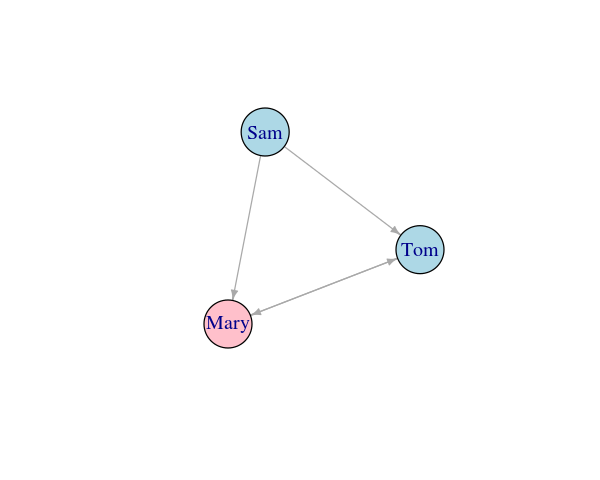

In [26]:
plot(dg, vertex.size=50)

In [27]:
print(degree(dg, mode = "in"))

 Sam Mary  Tom 
   0    2    2 


A *cycle* is a path from one vertex to itself without repeated nodes.

A *connected graph* is a grap where every vertex is reachable from every other.

A *component* of a graph, is a maximally connected subgraph, i.e. the larges connected subgraph.

In [28]:
is.connected(g)

[1] TRUE

A directed graph is *weakly* connected if its underlying (undirected) graph is connected.

It is *strongly* connected if all vertices are reachable from all vertices.

In [29]:
is.connected(dg, mode="weak")

[1] TRUE

In [30]:
is.connected(dg, mode="strong")

[1] FALSE

### Diameter

The diameter of a graph is its 